In [ ]:
import pandas as pd
import numpy as np
pd.options.display.max_columns
import scipy.stats as stats

# VIsualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

#Manejo de avisos de Warning
import warnings
warnings.filterwarnings('ignore')

Carga de Datos

In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/EAN/proyecto VIC/datos_VIC.xlsx")

In [ ]:
datos.head(10)

,id,ano del hecho,sexo de la victima,grupo de edad de la victima,grupo mayor menor de edad,edad judicial,ciclo vital,pais de nacimiento de la victima,escolaridad,estado civil,...,diagnostico topografico de la lesion,sexo del presunto agresor,presunto agresor,condicion de la victima,medio de desplazamiento o transporte,servicio del vehiculo,clase o tipo de accidente,objeto de colision,servicio del objeto de colision,días de incapacidad medicolegal
0,1,2015,Hombre,(10 a 14),a) Menores de Edad (<18 años),(10 a 13),(12 a 17) Adolescencia,Colombia,Educación básica primaria,Soltero (a),...,Trauma de miembros,Hombre,Padre,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,1 a 30
1,2,2015,Hombre,(00 a 04),a) Menores de Edad (<18 años),(00 a 04),(00 a 05) Primera Infancia,Colombia,Sin escolaridad,No aplica,...,Trauma de miembros,Mujer,Madre,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,1 a 30
2,3,2015,Hombre,(00 a 04),a) Menores de Edad (<18 años),(00 a 04),(00 a 05) Primera Infancia,Colombia,Sin escolaridad,No aplica,...,Sin información,Mujer,Otros familiares civiles o consanguíneos,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,Sin información
3,4,2015,Hombre,(00 a 04),a) Menores de Edad (<18 años),(00 a 04),(00 a 05) Primera Infancia,Colombia,Sin escolaridad,No aplica,...,Trauma facial,Mujer,Abuelo (a),No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,1 a 30
4,5,2015,Hombre,(25 a 29),b) Mayores de Edad (>18 años),(25 a 28),(18 a 28) Juventud,Colombia,Sin información,Unión libre,...,Trauma facial,Hombre,Hermano (a),No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,1 a 30
5,6,2015,Mujer,(00 a 04),a) Menores de Edad (<18 años),(00 a 04),(00 a 05) Primera Infancia,Colombia,Sin escolaridad,No aplica,...,Trauma facial,Hombre,Padre,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,1 a 30
6,7,2015,Mujer,(05 a 09),a) Menores de Edad (<18 años),(05 a 09),(06 a 11) Infancia,Colombia,Educación inicial y educación preescolar,No aplica,...,Trauma de miembros,Mujer,Otros familiares civiles o consanguíneos,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,1 a 30
7,8,2015,Hombre,(50 a 54),b) Mayores de Edad (>18 años),(50 a 54),(29 a 59) Adultez,Colombia,Educación inicial y educación preescolar,Unión libre,...,Politraumatismo,Mujer,Nuera,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,1 a 30
8,9,2015,Hombre,(70 a 74),b) Mayores de Edad (>18 años),(70 a 74),(Más de 60) Adulto Mayor,Colombia,Sin escolaridad,Casado (a),...,Piel y faneras,Hombre,Nieto (a),No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,1 a 30
9,10,2015,Hombre,(70 a 74),b) Mayores de Edad (>18 años),(70 a 74),(Más de 60) Adulto Mayor,Colombia,Educación inicial y educación preescolar,"Separado (a), Divorciado (a)",...,Trauma de tórax,Hombre,Otros familiares civiles o consanguíneos,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,1 a 30


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615709 entries, 0 to 615708
Data columns (total 37 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   id                                    615709 non-null  int64 
 1   ano del hecho                         615709 non-null  int64 
 2   sexo de la victima                    615709 non-null  object
 3   grupo de edad de la victima           615709 non-null  object
 4   grupo mayor menor de edad             615709 non-null  object
 5   edad judicial                         615709 non-null  object
 6   ciclo vital                           615709 non-null  object
 7   pais de nacimiento de la victima      615709 non-null  object
 8   escolaridad                           615709 non-null  object
 9   estado civil                          615709 non-null  object
 10  tipo de discapacidad                  615709 non-null  object
 11  pertenencia e

In [ ]:
datos.shape

(615709, 37)

In [ ]:
datos.columns = [column.replace(' ', '_') for column in datos.columns]

In [ ]:
datos.head(5)

,id,ano_del_hecho,sexo_de_la_victima,grupo_de_edad_de_la_victima,grupo_mayor_menor_de_edad,edad_judicial,ciclo_vital,pais_de_nacimiento_de_la_victima,escolaridad,estado_civil,...,diagnostico_topografico_de_la_lesion,sexo_del_presunto_agresor,presunto_agresor,condicion_de_la_victima,medio_de_desplazamiento_o_transporte,servicio_del_vehiculo,clase_o_tipo_de_accidente,objeto_de_colision,servicio_del_objeto_de_colision,días_de_incapacidad_medicolegal
0,1,2015,Hombre,(10 a 14),a) Menores de Edad (<18 años),(10 a 13),(12 a 17) Adolescencia,Colombia,Educación básica primaria,Soltero (a),...,Trauma de miembros,Hombre,Padre,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,1 a 30
1,2,2015,Hombre,(00 a 04),a) Menores de Edad (<18 años),(00 a 04),(00 a 05) Primera Infancia,Colombia,Sin escolaridad,No aplica,...,Trauma de miembros,Mujer,Madre,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,1 a 30
2,3,2015,Hombre,(00 a 04),a) Menores de Edad (<18 años),(00 a 04),(00 a 05) Primera Infancia,Colombia,Sin escolaridad,No aplica,...,Sin información,Mujer,Otros familiares civiles o consanguíneos,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,Sin información
3,4,2015,Hombre,(00 a 04),a) Menores de Edad (<18 años),(00 a 04),(00 a 05) Primera Infancia,Colombia,Sin escolaridad,No aplica,...,Trauma facial,Mujer,Abuelo (a),No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,1 a 30
4,5,2015,Hombre,(25 a 29),b) Mayores de Edad (>18 años),(25 a 28),(18 a 28) Juventud,Colombia,Sin información,Unión libre,...,Trauma facial,Hombre,Hermano (a),No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,1 a 30


realizao un conteo de los valores contenidos en cada variable de la base de datos para identificar variables que no cuentan con datos  o tiene datos insuficientes para así considerar si el descarte de variables.

se identifican 6 variables que no cuentan con datos, son las siguientes

CONDICION_DE_LA_VICTIMA

MEDIO_DE_DESPLAZAMIENTO_O_TRANSPORTE

SERVICIO_DEL_VEHICULO

CLASE_O_TIPO_DE_ACCIDENTE

OBJETO_DE_COLISION

SERVICIO_DEL_OBJETO_DE_COLISION


Existen 5 filas con datos denominados  "Por Determianr", se revisan si contiene información útil que pueda afectar el estudio en caso de eliminarce, una vez revisadas se determina que estas filas pueden ser eliminadas.

In [ ]:
for i in datos:
    print("-------------------------")
    print(f"-----------<{i.upper()}>-------------")
    print(datos[i].value_counts())


-------------------------
-----------<ID>-------------
id
1         1
410453    1
410455    1
410456    1
410457    1
         ..
205211    1
205212    1
205213    1
205214    1
615709    1
Name: count, Length: 615709, dtype: int64
-------------------------
-----------<ANO_DEL_HECHO>-------------
ano_del_hecho
2018    78314
2017    77610
2019    77303
2016    77180
2015    74233
2023    68403
2022    62476
2021    53008
2020    47182
Name: count, dtype: int64
-------------------------
-----------<SEXO_DE_LA_VICTIMA>-------------
sexo_de_la_victima
Mujer     473621
Hombre    142088
Name: count, dtype: int64
-------------------------
-----------<GRUPO_DE_EDAD_DE_LA_VICTIMA>-------------
grupo_de_edad_de_la_victima
(25 a 29)         105476
(20 a 24)          96571
(30 a 34)          88951
(35 a 39)          67230
(40 a 44)          46820
(45 a 49)          32347
(10 a 14)          27412
(15 a 17)          27083
(18 a 19)          25383
(50 a 54)          24499
(05 a 09)          19303
(55

In [ ]:
datos.drop(columns=['id','condicion_de_la_victima',
       'medio_de_desplazamiento_o_transporte', 'servicio_del_vehiculo',
       'clase_o_tipo_de_accidente', 'objeto_de_colision',
       'servicio_del_objeto_de_colision'], inplace=True, axis=1)

In [ ]:
datos.drop(datos[datos["grupo_de_edad_de_la_victima"] == "Por determinar"].index, inplace=True)

In [ ]:
datos["sexo_del_presunto_agresor"].value_counts()

,count
sexo_del_presunto_agresor,
Hombre,344086
HOMBRE,147882
Mujer,86319
MUJER,34471
Sin información,2936
Transgenero,9
No binario,1


In [ ]:
datos["sexo_del_presunto_agresor"].replace("HOMBRE","Hombre", inplace=True)
datos["sexo_del_presunto_agresor"].replace("MUJER","Mujer", inplace=True)

# 2 Analisis Exploratorio de Datos

#### - Distribución por Sexo de la victima Vs  Años de los Hechos

In [ ]:
dist_year = datos[["ano_del_hecho", "sexo_de_la_victima"]]

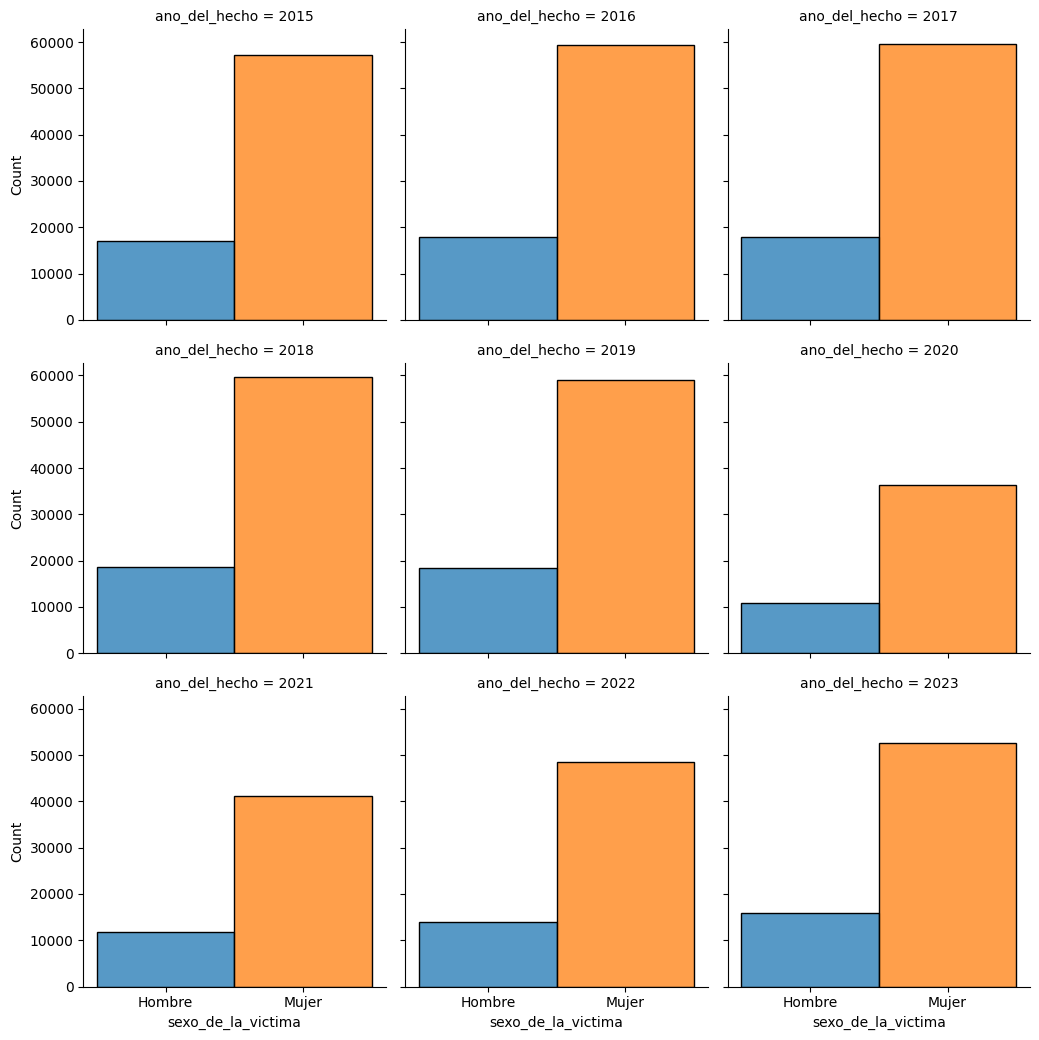

In [ ]:
g = sns.FacetGrid(dist_year, col="ano_del_hecho", height=3.5, col_wrap=3, hue="sexo_de_la_victima")
g.map(sns.histplot, "sexo_de_la_victima")
plt.show()

In [ ]:
datos["sexo_de_la_victima"].value_counts(normalize=True)

,proportion
sexo_de_la_victima,
Mujer,0.769227
Hombre,0.230773


<Axes: title={'center': 'Violencia Intrafamiliar Hombres Vs Mujeres'}, xlabel='sexo_de_la_victima'>

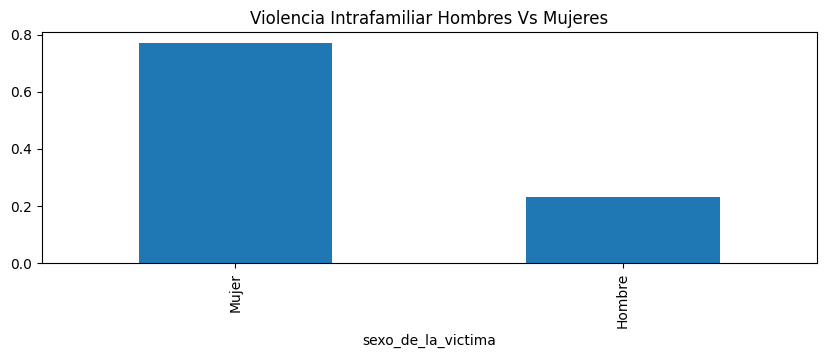

In [ ]:
datos["sexo_de_la_victima"].value_counts(normalize=True).plot(kind="bar", title="Violencia Intrafamiliar Hombres Vs Mujeres", figsize=(10,3) )

Interpretación:
    
    Al discriminar las variables "sexo de la victima" y Años de los hechos
    se evidencia como las mayores victimas de violencia intrafamiliar se concentra
    mayormente en las mujeres ya sean mayores o menores de edad.
    
    Al ver los porcentajes generales podemos evidenciar que:
    
    76% de los datos corresponden a mujeres afectadas contra un 23% de hombre
    
    En los años 2020 y 2021 se registra un ligero descenso de hechos relacionados con vilencia
    al interior de las familias pero para los años siguientes vuelve y mostras señales de incremento
    constante de este fenomeno.
    

#### - Distribución por sexo y clasificación de edad Mayor de edad Vs Menor de Edad

In [ ]:
dis_por_edad = datos[["sexo_de_la_victima" ,"grupo_mayor_menor_de_edad", "ano_del_hecho"]]

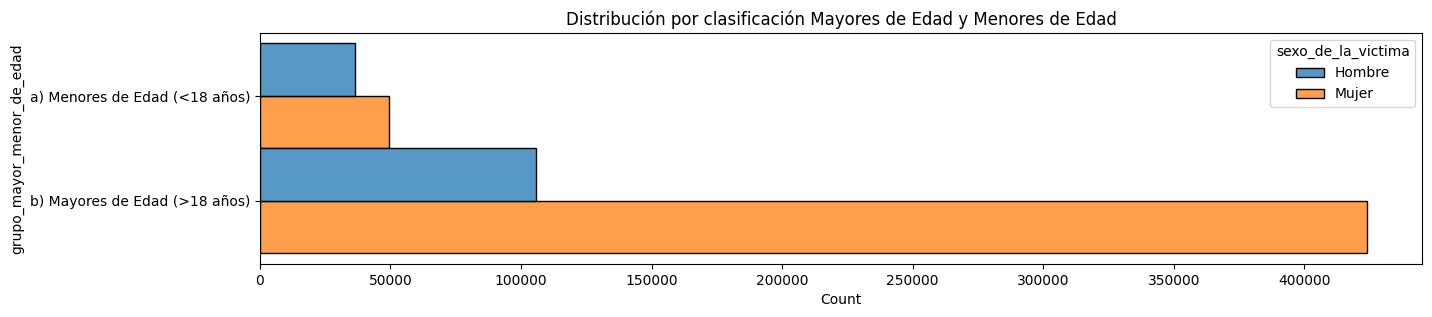

In [ ]:
plt.figure(figsize=(15,3))
sns.histplot(data=dis_por_edad , y="grupo_mayor_menor_de_edad", hue="sexo_de_la_victima", multiple="dodge") #{"layer", "dodge", "stack", "fill"}
plt.title("Distribución por clasificación Mayores de Edad y Menores de Edad")
plt.show()

Interpretación:
    
    Se evidencia una mayor distribución de casos de violencia intrafamiliar
    en los grupos de hombre y mujeres mayores de edad con una marcada diferencia
    de violencia intra familiar en mujeres, esto tambien se refleja en las mujeres
    menores de edad donde tambien son las más afectadas.


#### Violencia Intrafamiliar y Escolaridad

MUjeres

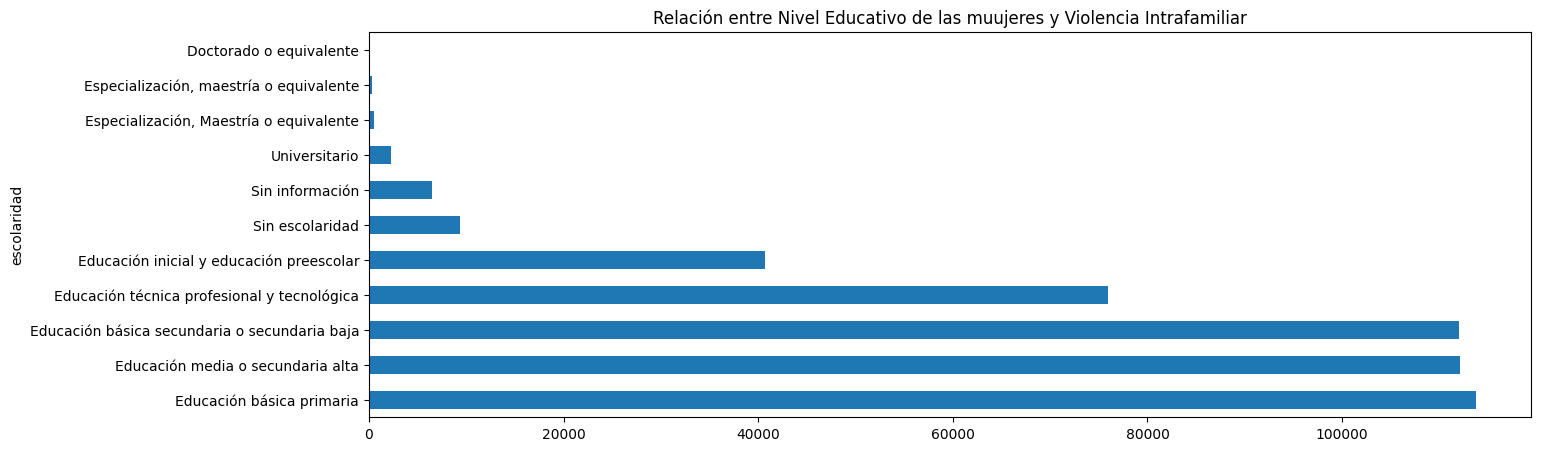

In [ ]:
escolaridad = datos[["sexo_de_la_victima" ,"escolaridad"]]
escolaridad_mujeres = escolaridad[escolaridad["sexo_de_la_victima"]=="Mujer"]
titulo = "Relación entre Nivel Educativo de las muujeres y Violencia Intrafamiliar"
escolaridad_mujeres["escolaridad"].value_counts().plot(kind="barh", figsize=(15,5), title=titulo)
plt.show()

Hombres

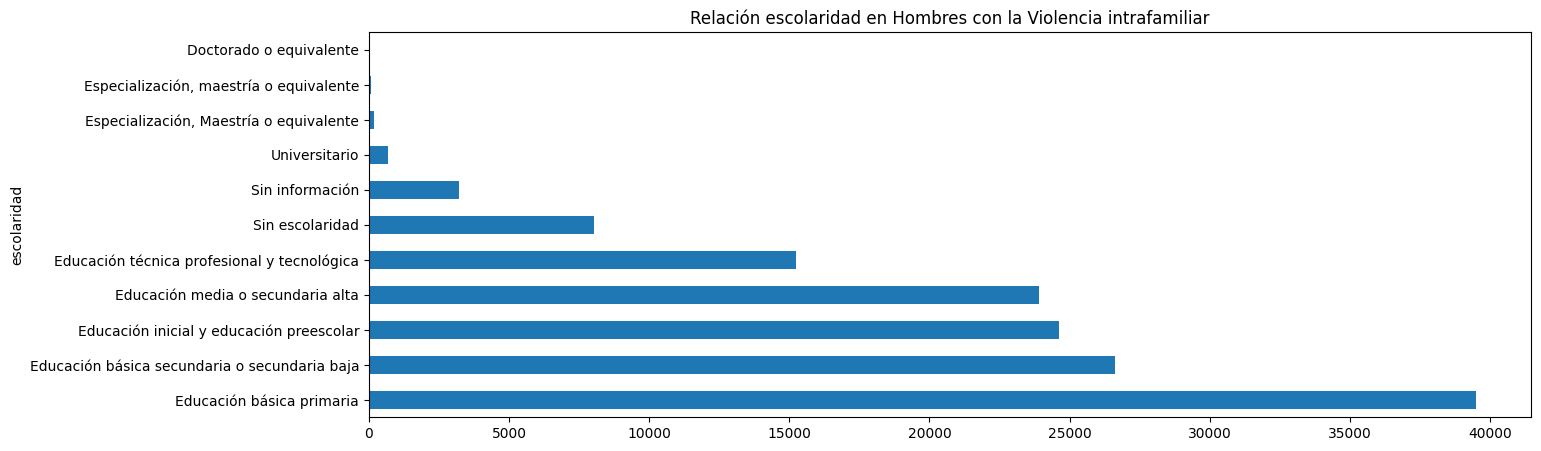

In [ ]:
escolaridad = datos[["sexo_de_la_victima" ,"escolaridad"]]
escolaridad_hombres = escolaridad[escolaridad["sexo_de_la_victima"]=="Hombre"]
titulo = "Relación escolaridad en Hombres con la Violencia intrafamiliar"
escolaridad_hombres["escolaridad"].value_counts().plot(kind="barh", figsize=(15,5), title=titulo)
plt.show()

Interpretación:

    El nivel educativo tiene un marcado impacto en en los niveles de violencia intrafamiliar
    se evidencia que a mayor es el nivel de escolaridad en hombres y mujeres, se presentan
    menosres episodios de violencia entre las familiar a las que pertenencen
    
    Los niveles de violencia intrafamiliar desienden fuertemente cuando el hombre o mujer
    cuentan con titulos universitarios o posteriores
    
    Tambien se envidencia algo interesante en los datos y es que en los datos que indican
    falta de escolaridad "Sin Escolaridad" tambien se menores caso de violencia tanto en
    hombres y mujeres.

#### - Estado Civil y Violencia Intrafamiliar

In [ ]:
estado_civil = datos[["ano_del_hecho","sexo_de_la_victima", "estado_civil", "edad_judicial", "grupo_mayor_menor_de_edad"]]

<Axes: title={'center': 'Violencia intra familiar & Estado Civil'}, ylabel='estado_civil'>

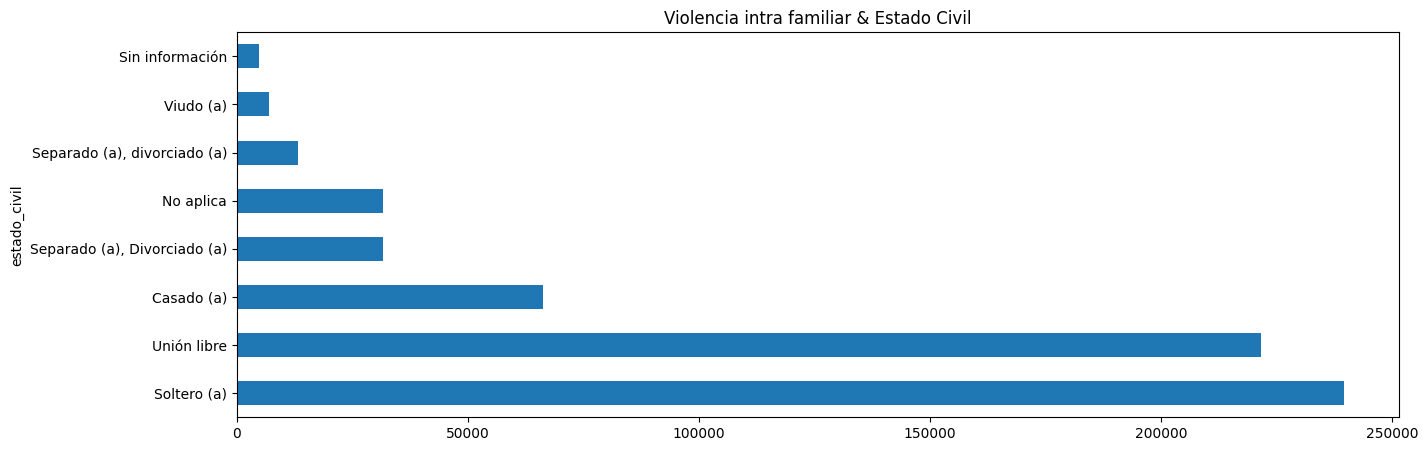

In [ ]:
titulo = "Violencia intra familiar & Estado Civil"
estado_civil["estado_civil"].value_counts().plot(kind="barh", figsize=(15,5), title=titulo)

Estado Civil de Menores de Edad

In [ ]:
estado_civil_menores = estado_civil[estado_civil["grupo_mayor_menor_de_edad"] == "a) Menores de Edad (<18 años)"]

In [ ]:
estado_civil_menores["estado_civil"].count() - 31602

54496

In [ ]:
estado_civil_menores_df = pd.DataFrame(estado_civil_menores["estado_civil"].value_counts())
estado_civil_menores_df["%"] = estado_civil_menores["estado_civil"].value_counts(normalize=True)
print("----Estado Civil Menores de Edad----")
estado_civil_menores_df

----Estado Civil Menores de Edad----


,count,%
estado_civil,,
Soltero (a),49025,0.569409
No aplica,31602,0.367047
Unión libre,3649,0.042382
Sin información,1313,0.015250
"Separado (a), Divorciado (a)",338,0.003926
"Separado (a), divorciado (a)",91,0.001057
Viudo (a),43,0.000499
Casado (a),37,0.000430


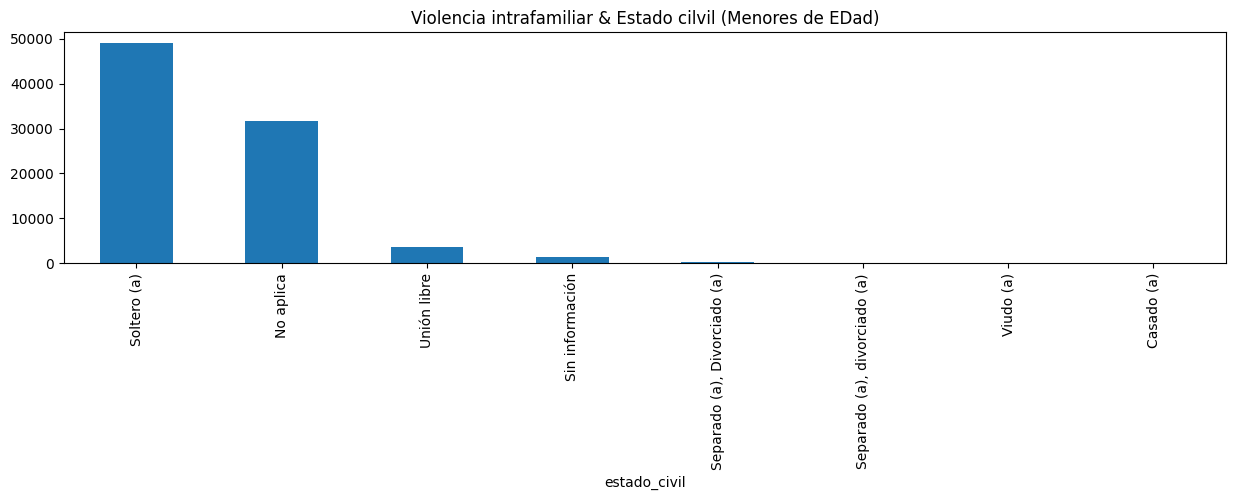

In [ ]:
titulo = "Violencia intrafamiliar & Estado cilvil (Menores de EDad)"
estado_civil_menores["estado_civil"].value_counts().plot(kind="bar", figsize=(15,3), title=titulo)
plt.show()

Estado Civil Mayores de Edad

In [ ]:
estado_civil_mayores = estado_civil[estado_civil["grupo_mayor_menor_de_edad"] == "b) Mayores de Edad (>18 años)" ]

In [ ]:
estado_civil_mayores["estado_civil"].count()

529606

In [ ]:
estado_civil_mayores_df = pd.DataFrame(estado_civil_mayores["estado_civil"].value_counts())
estado_civil_mayores_df["%"] =  estado_civil_mayores["estado_civil"].value_counts(normalize=True)
print("----Estado Civil Mayores de Edad----")
estado_civil_mayores_df["%"]

----Estado Civil Mayores de Edad----


,%
estado_civil,
Unión libre,0.411338
Soltero (a),0.359737
Casado (a),0.124844
"Separado (a), Divorciado (a)",0.059225
"Separado (a), divorciado (a)",0.024998
Viudo (a),0.013229
Sin información,0.006629


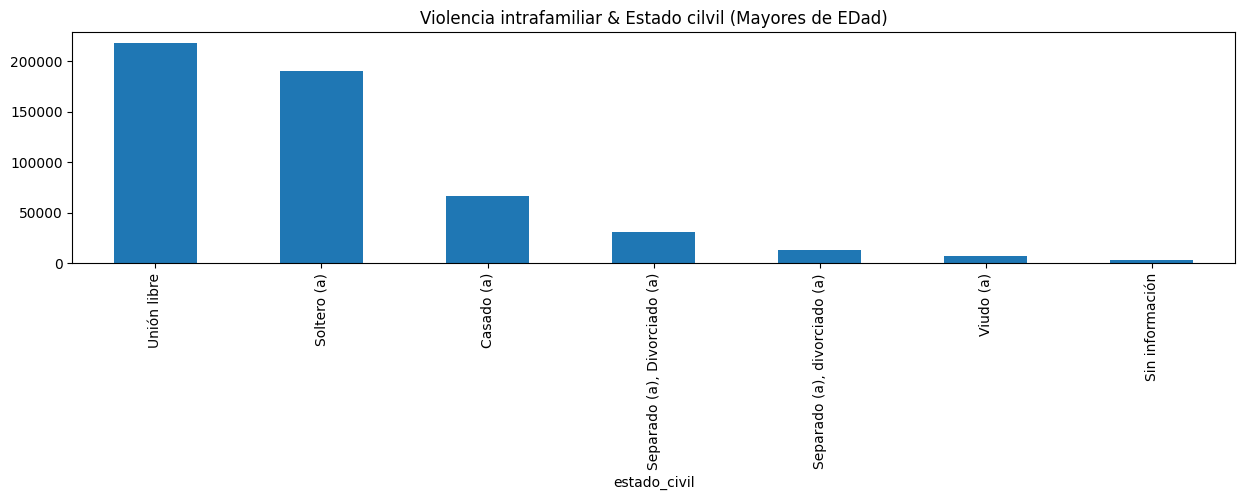

In [ ]:
titulo = "Violencia intrafamiliar & Estado cilvil (Mayores de EDad)"
estado_civil_mayores["estado_civil"].value_counts().plot(kind="bar", figsize=(15,3), title=titulo)
plt.show()

Interpretación:

    Al segmentar la base de datos en dos categorías "Mayores de Edad" & "Menores de Edad"
    nos encontramos con que 54.000 menores de edad ya contaban con al menos uno de los estados
    civiles que se consideraron dentro del estudio, lo que de por si ya representa un tipo de maltrato infantil
    y un tipo de violencia intra familiar.
    Curiosamente en este segmento de menores de edad la violencia intra familiar deciende a medida que el menor de edad
    adquiere alguno de los estados civiles.
    
    
    En el segmento de mayores de edad, el estado civil "Unión Libre" presenta el mayor número de casos de violencia intra familiar
    seguido por el sub segmento de "Solteros" y "casados" y desciende en los otros estados

#### - Discapacidad y Violencia Familiar

In [ ]:
discapacidad = datos[["ano_del_hecho", "sexo_de_la_victima", "edad_judicial", "tipo_de_discapacidad"]]
discapacidad["tipo_de_discapacidad"].value_counts(normalize=True)

,proportion
tipo_de_discapacidad,
Ninguna,0.996955
Física,0.000833
Auditiva,0.000637
Mental,0.000499
Discapacidad Múltiple,0.000479
Visual,0.000320
Psíquica,0.000278


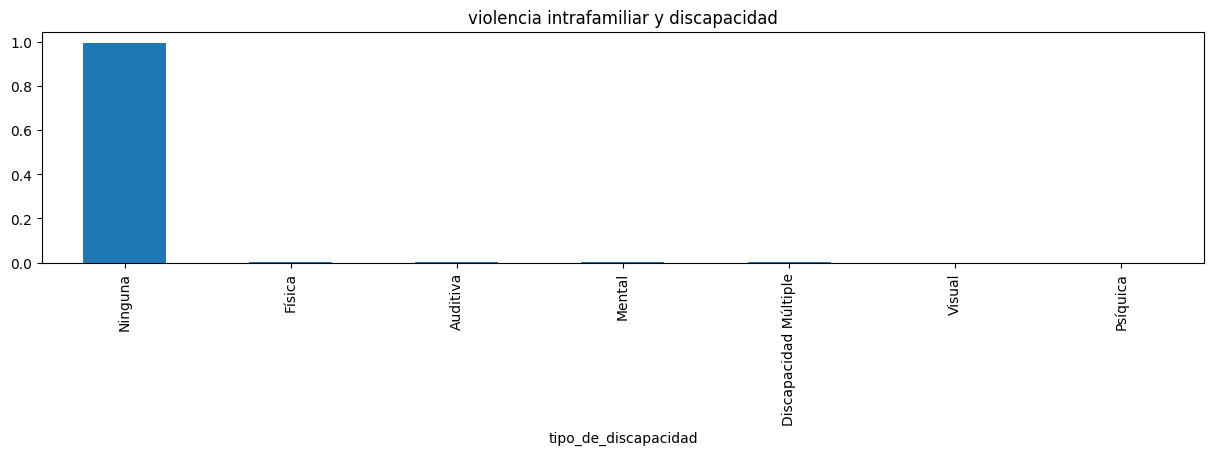

In [ ]:
titulo = "violencia intrafamiliar y discapacidad"
discapacidad["tipo_de_discapacidad"].value_counts(normalize=True).plot(kind="bar", figsize=(15,3), title=titulo)
plt.show()

Interpretación:

    Basados en el tipo de discapacidad, los datos muestran que los caso de violencia intrafamiliar
    no son tan comunes entre este segmento de la población, mayoritariamente se concentra en en  hombres y  mujeres
    sin ningun tipo de discapacidad reportada

#### - Temporalidad de los hechos de violencia intrafamiliar

In [ ]:
tiempo = datos[["ano_del_hecho", "mes_del_hecho", "dia_del_hecho",
                "rango_de_hora_del_hecho_x_3_horas", "sexo_de_la_victima",
                "grupo_mayor_menor_de_edad"]]

Discriminación por Año

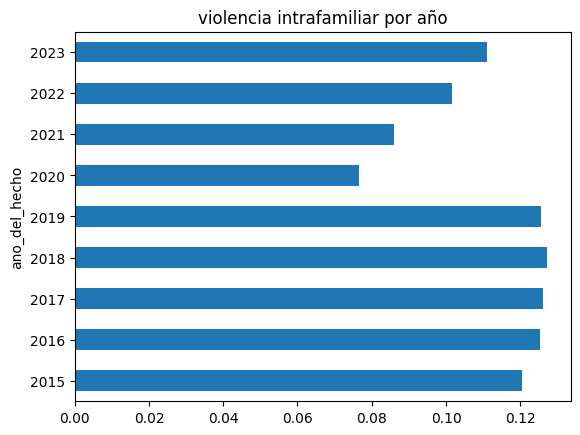

In [ ]:
año = pd.DataFrame(tiempo["ano_del_hecho"].value_counts())
año["%"] = tiempo["ano_del_hecho"].value_counts(normalize=True)
año.sort_index(inplace=True)
año["%"].plot(kind="barh", title="violencia intrafamiliar por año")
plt.show()

Discriminación de datos por mes

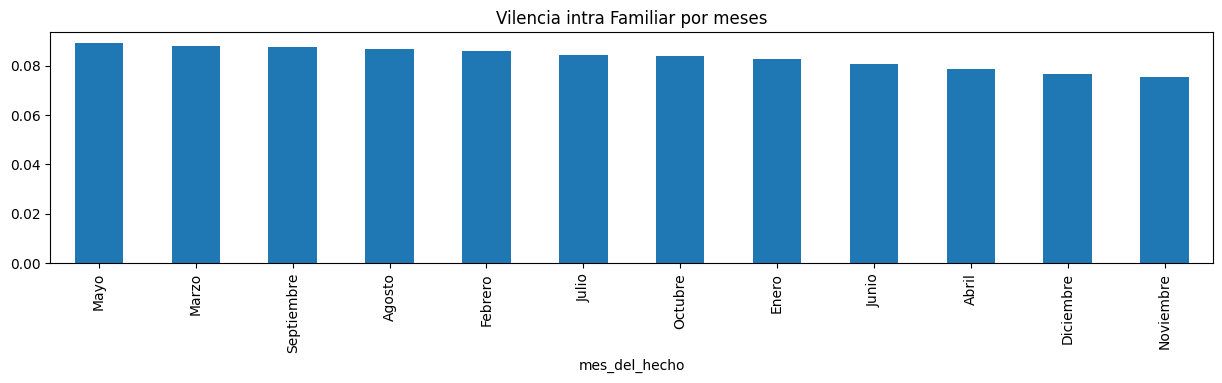

In [ ]:
mes = pd.DataFrame(tiempo["mes_del_hecho"].value_counts())
mes["%"] = tiempo["mes_del_hecho"].value_counts(normalize=True)
mes["%"].plot(kind="bar", figsize=(15,3), title="Vilencia intra Familiar por meses")
plt.show()

Discriminación de datos por día

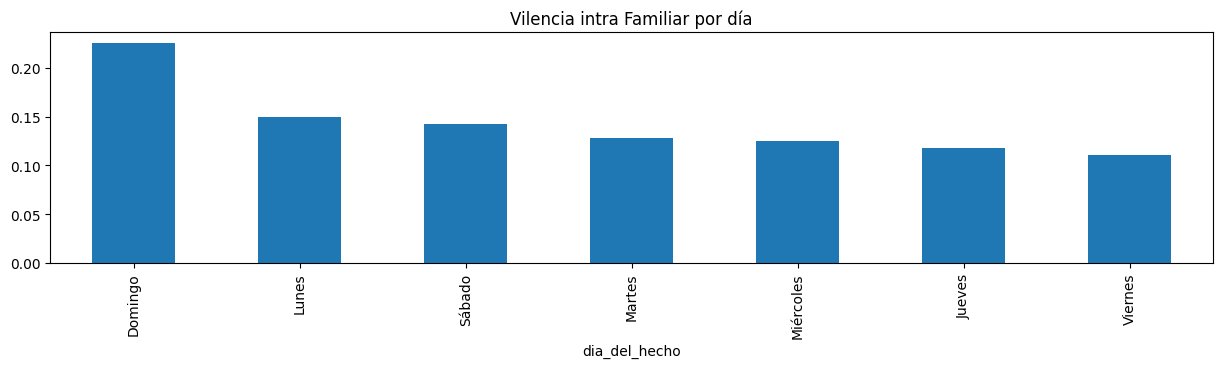

In [ ]:
dia = pd.DataFrame(tiempo["dia_del_hecho"].value_counts())
dia["%"] = tiempo["dia_del_hecho"].value_counts(normalize=True)
dia["%"].plot(kind="bar", figsize=(15,3), title="Vilencia intra Familiar por día")
plt.show()

Discriminación de datos por hora

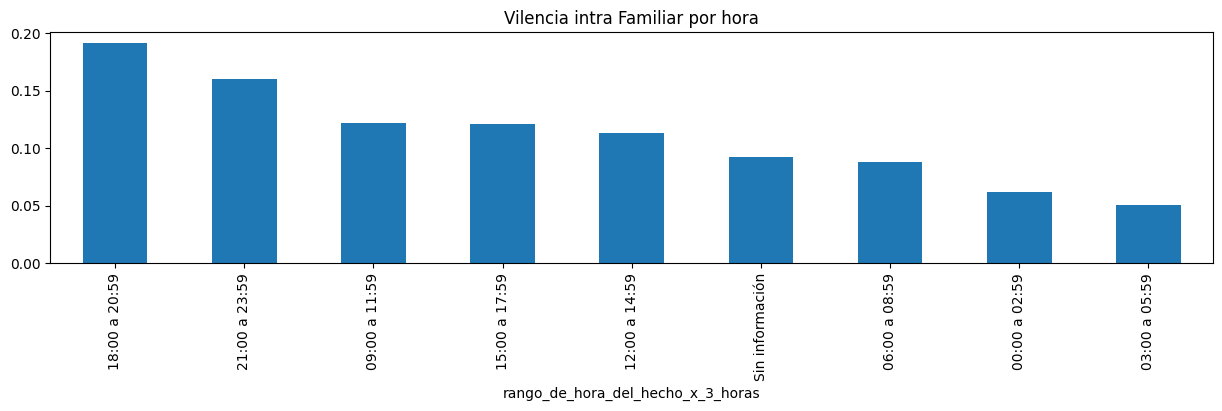

In [ ]:
hora = pd.DataFrame(tiempo["rango_de_hora_del_hecho_x_3_horas"].value_counts())
hora["%"] = tiempo["rango_de_hora_del_hecho_x_3_horas"].value_counts(normalize=True)
hora["%"].plot(kind="bar", figsize=(15,3), title="Vilencia intra Familiar por hora")
plt.show()

Interpretación:
    
    Al analizar los casos por año, desde el 2015 hasta el 2019 presentanuna tasa de hechos de violencia intrafamiliar
    sin cambios muy notorios, distinto al año 2020 del cual probablemente muchos caso no fueron denunciados debido a la pandemia
    , posterior a esta se empieza a evidencia un crecimiento sostenido hasta el 2023
    
    
    Pasa similar con el analisis por meses, el comportamiento de los datos muestra una cierta estabilidad con cambios ligeramente
    notorios,no resaltando ningun cambio realmente significativo destacable.
    
    Por el contrario, al analizar por días, los Domingos, son el día que más presenta casos de violencia intrafamiliar y los viernes
    el día en que menos
    
    En el analisis por horas del día, el horario con mayores casos es entre las 6 a 10 de la noches y
    el horario con menos casos de 3 a 6 de la mañana

#### - Lugar donde suceden los hechos

In [ ]:
lugar = datos[["departamento_del_hecho_dane", "municipio_del_hecho_dane", "localidad_del_hecho", "zona_del_hecho"]]

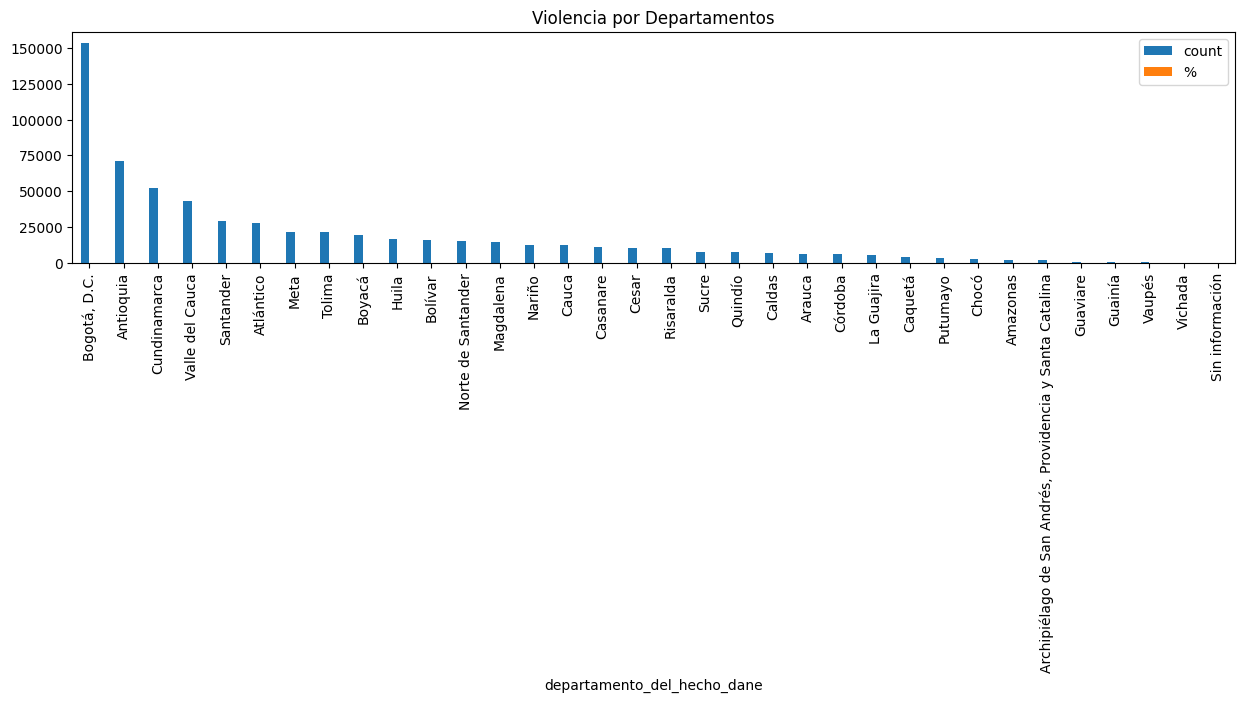

In [ ]:
departamentos = pd.DataFrame(lugar["departamento_del_hecho_dane"].value_counts())
departamentos["%"] = lugar["departamento_del_hecho_dane"].value_counts(normalize=True)
departamentos.plot(kind="bar", figsize=(15,3), title="Violencia por Departamentos")
plt.show()

Distrito Capital

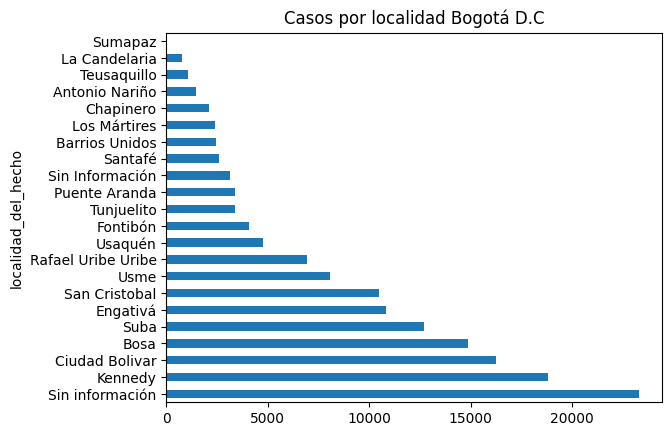

In [ ]:
distrito_capital = lugar[lugar["departamento_del_hecho_dane"] == "Bogotá, D.C." ]
distrito_capital["localidad_del_hecho"].value_counts().plot(kind="barh", title="Casos por localidad Bogotá D.C")
plt.show()

interpretación:

    Los departamentos con mayores caso son Bogot D.C, seguido Antioquia, continuando con Cundinamarcay Valle del cauca,
    estos los lugares donde más se concentran los caso de violencia intra familiar
    
    Al detallar el Distrito Capital es evidente que las zonas con mayor dencidad poblacional son en las que mayores
    crimenes de violencia intr familiar presentan

#### - Victimario y Circunstancia del hecho de violencia

In [ ]:
circunstancias = datos[["presunto_agresor","sexo_del_presunto_agresor",
                        "escenario_del_hecho", "actividad_durante_el_hecho",
                        "circunstancia_del_hecho", "contexto_de_violencia",
                        "mecanismo_causal", "diagnostico_topografico_de_la_lesion"]]

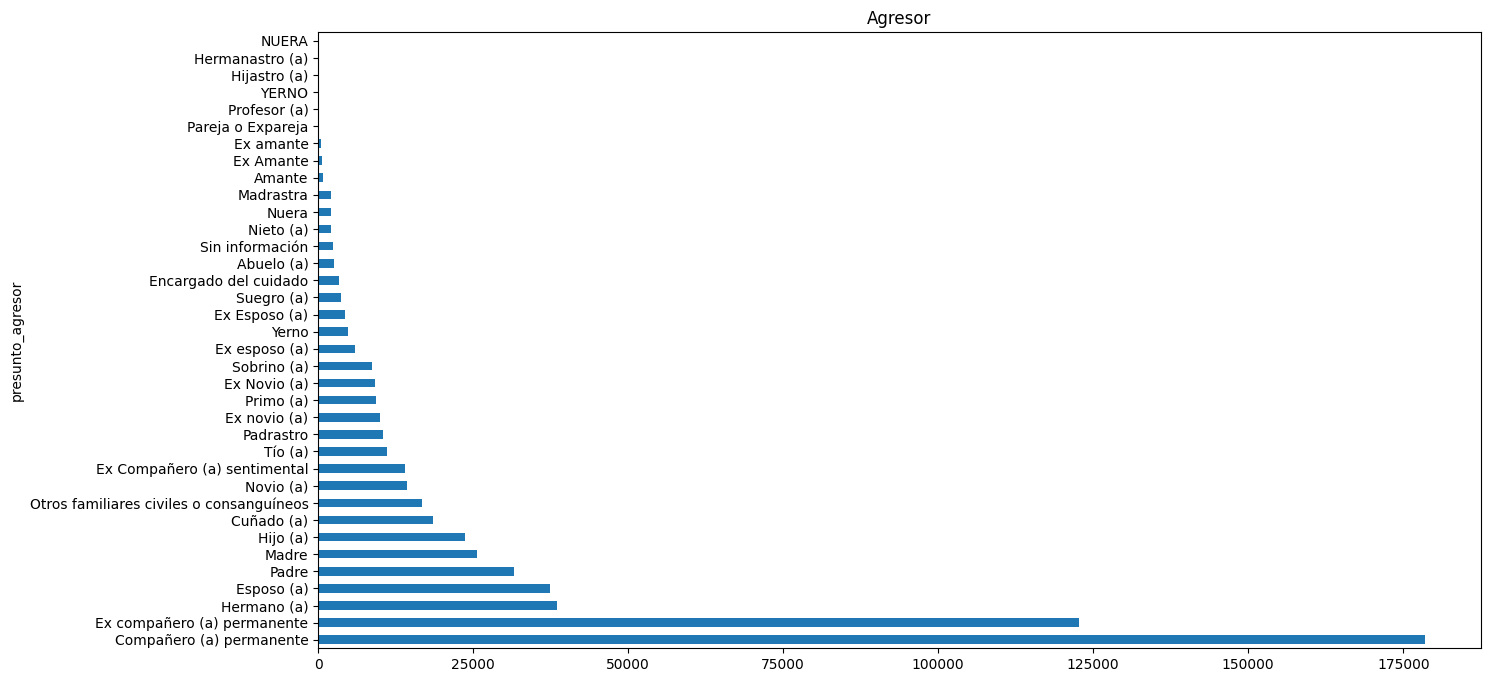

In [ ]:
agresor = circunstancias["presunto_agresor"].value_counts().plot(kind="barh", figsize=(15, 8), title="Agresor")

<Axes: title={'center': 'Mecanismo de violencia'}, ylabel='mecanismo_causal'>

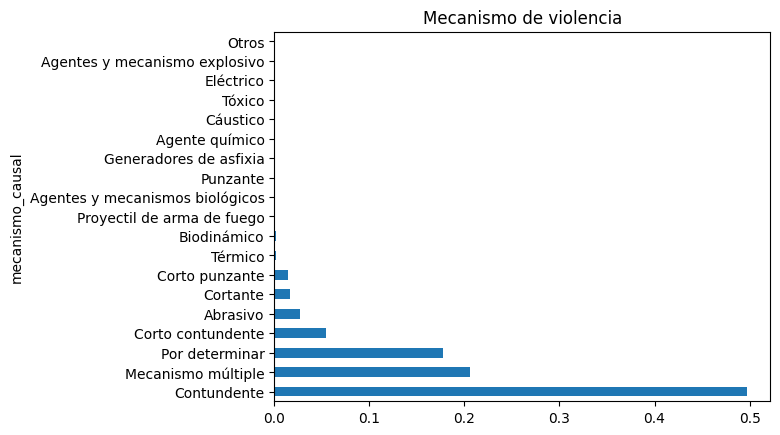

In [ ]:
circunstancias["mecanismo_causal"].value_counts(normalize=True).plot(kind="barh", title="Mecanismo de violencia")

<Axes: title={'center': 'Tipo de erida o trauma causado'}, ylabel='diagnostico_topografico_de_la_lesion'>

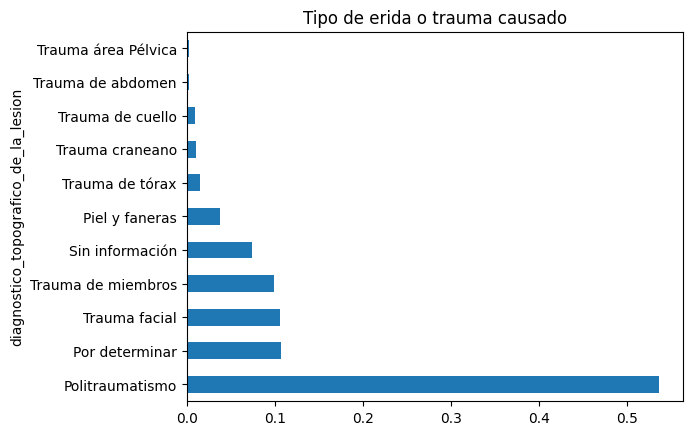

In [ ]:
circunstancias["diagnostico_topografico_de_la_lesion"].value_counts(normalize=True).plot(kind="barh", title="Tipo de erida o trauma causado")

Interpretación:

    Al ver la distribución de los datos, es evidente con son las persona más cercanas a la víctima quienes cometen
    esta clase de delito, resalta dos en particular,  "Los compañeros permanentes" y "Ex parejas", son quienes más caso generan
    basado en los datos de este estudio.
    
    Los principales medio o mecanismos causales de daño en el contexto de la violencia intrafamiliar resaltan tres elementos
    causales de daño como son Arma Contundente con un 50%, seguido por Mecanismos Multiples con un 20% y sin determinar existe un 18%
    
    los datos sobre las lesiones son coherente con las armas usadas para el acto de violencia, ya que destaca el Politraumatismo
    por arriba del 50%